In [1]:
import os,sys
sys.path.append('/w/jam-sciwork24/prokudin/jam3d_dev_lib')
sys.path.append('/w/jam-sciwork24/prokudin/jam3dlib')
os.environ["JAM3D"] = "/w/jam-sciwork24/prokudin/jam3d_dev_lib"
from tools.tools     import checkdir,save,load,lprint
import tools.config
from tools.config    import load_config, conf
import numpy as np
from tmd import TMD
import matplotlib as plt
import pylab as py
import pandas as pd

In [2]:
cd '/w/jam-sciwork24/prokudin/jam3dlib'

/w/jam-sciwork24/prokudin/jam3dlib


In [3]:
mypath = '/w/jam-sciwork24/prokudin/PSU_PHYS496/AI/gan'

In [4]:
tag='JAM3D_2022' #tag for a given analysis (see "List of Fits")
tmd=TMD(tag)

parman: pdf
order: [1, 'pdf', 'widths1_uv']
order: [1, 'pdf', 'widths1_sea']
parman: pdfpi-
parman: ffpi
order: [1, 'ffpi', 'widths1_fav']
order: [1, 'ffpi', 'widths1_ufav']
parman: ffk
order: [1, 'ffk', 'widths1_fav']
order: [1, 'ffk', 'widths1_ufav']
parman: ffh
parman: transversity
order: [1, 'transversity', 'widths1_uv']
order: [1, 'transversity', 'u N0 1']
order: [1, 'transversity', 'u N1 1']
order: [1, 'transversity', 'u a0 1']
order: [1, 'transversity', 'u b0 1']
order: [1, 'transversity', 'u b1 1']
order: [1, 'transversity', 'd N0 1']
order: [1, 'transversity', 'd N1 1']
order: [1, 'transversity', 'd a0 1']
parman: collinspi
order: [1, 'collinspi', 'widths1_fav']
order: [1, 'collinspi', 'widths1_ufav']
order: [1, 'collinspi', 'u N0 1']
order: [1, 'collinspi', 'u N1 1']
order: [1, 'collinspi', 'u a0 1']
order: [1, 'collinspi', 'u a1 1']
order: [1, 'collinspi', 'u b0 1']
order: [1, 'collinspi', 'u b1 1']
order: [1, 'collinspi', 'u b0 2']
order: [1, 'collinspi', 'u b1 2']
order: [

In [5]:
M = 0.93891897
Mpi = 0.135

In [6]:
#icol=False will give the full TMD while icol=True will return only the collinear part: see Eqs. (3)-(7) of arXiv:2002.08384
#The 5th argument in tmd.eval is the hadron (p: proton, pi: pion)
#The 6th argument in tmd.eval is the replica index (0 is chosen in this case). You can get the number of replicas via tmd.nrep.
#11 partons: 0=g,1=u,2=ub,3=d,4=db,5=s,6=sb,7=c,8=cb,9=b,10=bb

x=0.1
Q2=10.0
kT=0.1
print(tmd.eval(x,Q2,kT,'p','pdf',0,icol=False))
print(tmd.eval(x,Q2,kT,'p','sivers',0,icol=False))
print(tmd.eval(x,Q2,kT,'p','sivers',0,icol=True))

[7.84175357e+00 3.64503757e+00 5.69564180e-01 2.52804796e+00
 7.06690597e-01 3.31212163e-01 3.31212163e-01 1.26601743e-01
 1.26601743e-01 1.61433295e-04 1.61433295e-04]
[ 0.         -0.54450382  0.          0.87315847  0.          0.
  0.          0.          0.          0.          0.        ]
[ 0.         -0.21872618  0.          0.35074615  0.          0.
  0.          0.          0.          0.          0.        ]


In [7]:
tmd.nrep

465

In [13]:
x=0.1
Q2=10.0
kT=0.1
irep = 0 # this one can be varied in order to create multiple images
def plot_function_u(irep,x,Q2,kTx,kTy):
    kT = np.sqrt(kTx**2 + kTy**2)
    return tmd.eval(x,Q2,kT,'p','pdf',irep,icol=False)[1] - kTx/M * tmd.eval(x,Q2,kT,'p','sivers',irep,icol=False)[1]
kTx,kTy = 0.1,0.1
print(plot_function_u(irep,x,Q2,kTx,kTy))

3.628931235248452


In [59]:
#--matplotlib
import matplotlib
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath} \usepackage{bm}"
matplotlib.rc('text',usetex=True)

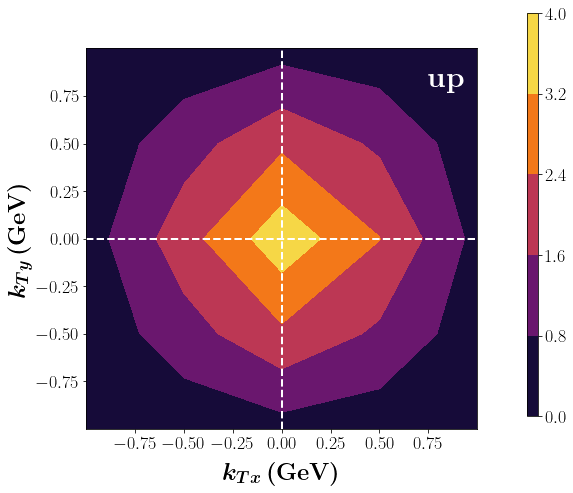

In [87]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import Normalize
import matplotlib.cm as cm

npixels = 5

kTx = np.linspace(-1,1,npixels)
kTy = np.linspace(-1,1,npixels)
X, Y = np.meshgrid(kTx, kTy)

Z=[]
x = 0.1
Q2 = 10

irep = 0 # this can be changed to produce replicas of images, can be from 0 to 465
for ky in kTy:
    Z1 = []
    for kx in kTx:
        Z1.append(plot_function_u(irep,x,Q2,kx,ky))
    Z.append(Z1)
    
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*7,nrows*7))
ax=py.subplot(nrows,ncols,1)   
ax.axhline(0,color='white',ls='--',linewidth=2)
ax.axvline(0,color='white',ls='--',linewidth=2)
#im = ax.imshow(Z, interpolation='bilinear', origin='lower',
#               cmap=cm.inferno, extent=(-1, 1, -1, 1))
c1=ax.contourf(X,Y,Z,cmap='inferno',levels=npixels)
ax.set_ylabel(r'\boldmath{$k_{Ty}\,{\rm (GeV)}$}',fontsize=24)
ax.set_xlabel(r'\boldmath{$k_{Tx}\,{\rm (GeV)}$}',fontsize=24,labelpad=10)
ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
ax.tick_params(labelsize=18)
#ax.set_yticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
#                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])
ax.set_xticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
#ax.set_xticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
#                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])

ax.text(0.875,0.9,r'\boldmath{${\rm up}$}',size=30,color='white',transform=ax.transAxes)

cbar_ax=fig.add_axes([1., 0.15, 0.02, 0.8])
cbar_ax.tick_params(labelsize=18)

cbar=fig.colorbar(c1,cax=cbar_ax)

plot_path = mypath+f'/images/sivers_npixels={npixels}x{npixels}_3D.pdf'
py.savefig(plot_path)

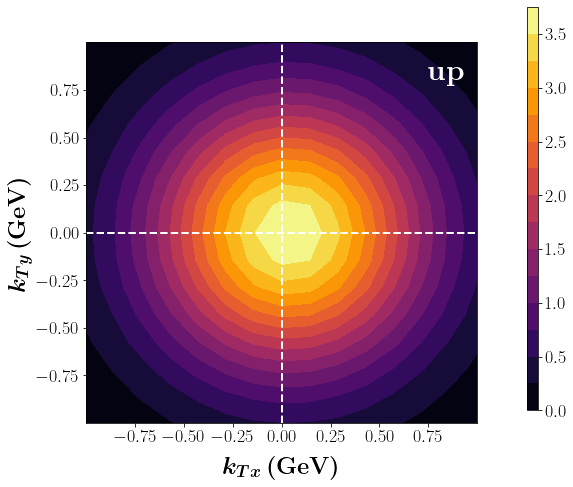

In [86]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import Normalize
import matplotlib.cm as cm

npixels = 15

kTx = np.linspace(-1,1,npixels)
kTy = np.linspace(-1,1,npixels)
X, Y = np.meshgrid(kTx, kTy)

Z=[]
x = 0.1
Q2 = 10

irep = 0 # this can be changed to produce replicas of images, can be from 0 to 465
for ky in kTy:
    Z1 = []
    for kx in kTx:
        Z1.append(plot_function_u(irep,x,Q2,kx,ky))
    Z.append(Z1)
    
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*7,nrows*7))
ax=py.subplot(nrows,ncols,1)   
ax.axhline(0,color='white',ls='--',linewidth=2)
ax.axvline(0,color='white',ls='--',linewidth=2)
#im = ax.imshow(Z, interpolation='bilinear', origin='lower',
#               cmap=cm.inferno, extent=(-1, 1, -1, 1))
c1=ax.contourf(X,Y,Z,cmap='inferno',levels=npixels)
ax.set_ylabel(r'\boldmath{$k_{Ty}\,{\rm (GeV)}$}',fontsize=24)
ax.set_xlabel(r'\boldmath{$k_{Tx}\,{\rm (GeV)}$}',fontsize=24,labelpad=10)
ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
ax.tick_params(labelsize=18)
#ax.set_yticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
#                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])
ax.set_xticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
#ax.set_xticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
#                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])

ax.text(0.875,0.9,r'\boldmath{${\rm up}$}',size=30,color='white',transform=ax.transAxes)

cbar_ax=fig.add_axes([1., 0.15, 0.02, 0.8])
cbar_ax.tick_params(labelsize=18)

cbar=fig.colorbar(c1,cax=cbar_ax)

plot_path = mypath+f'/images/sivers_npixels={npixels}x{npixels}_3D.pdf'
py.savefig(plot_path)

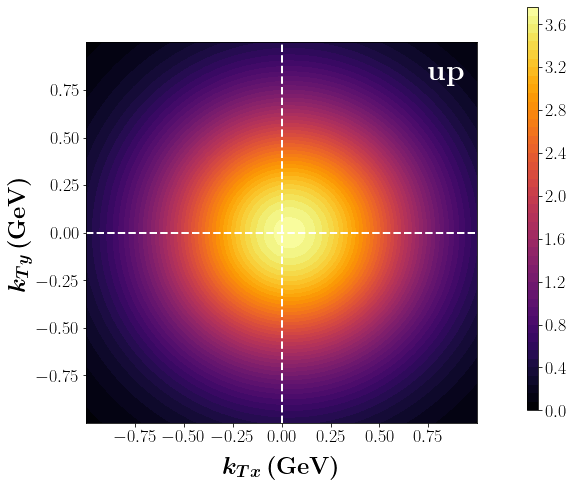

In [88]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import Normalize
import matplotlib.cm as cm

npixels = 50

kTx = np.linspace(-1,1,npixels)
kTy = np.linspace(-1,1,npixels)
X, Y = np.meshgrid(kTx, kTy)

Z=[]
x = 0.1
Q2 = 10

irep = 0 # this can be changed to produce replicas of images, can be from 0 to 465
for ky in kTy:
    Z1 = []
    for kx in kTx:
        Z1.append(plot_function_u(irep,x,Q2,kx,ky))
    Z.append(Z1)
    
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*7,nrows*7))
ax=py.subplot(nrows,ncols,1)   
ax.axhline(0,color='white',ls='--',linewidth=2)
ax.axvline(0,color='white',ls='--',linewidth=2)
#im = ax.imshow(Z, interpolation='bilinear', origin='lower',
#               cmap=cm.inferno, extent=(-1, 1, -1, 1))
c1=ax.contourf(X,Y,Z,cmap='inferno',levels=npixels)
ax.set_ylabel(r'\boldmath{$k_{Ty}\,{\rm (GeV)}$}',fontsize=24)
ax.set_xlabel(r'\boldmath{$k_{Tx}\,{\rm (GeV)}$}',fontsize=24,labelpad=10)
ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
ax.tick_params(labelsize=18)
#ax.set_yticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
#                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])
ax.set_xticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
#ax.set_xticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
#                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])

ax.text(0.875,0.9,r'\boldmath{${\rm up}$}',size=30,color='white',transform=ax.transAxes)

cbar_ax=fig.add_axes([1., 0.15, 0.02, 0.8])
cbar_ax.tick_params(labelsize=18)

cbar=fig.colorbar(c1,cax=cbar_ax)

plot_path = mypath+f'/images/sivers_npixels={npixels}x{npixels}_3D.pdf'
py.savefig(plot_path)

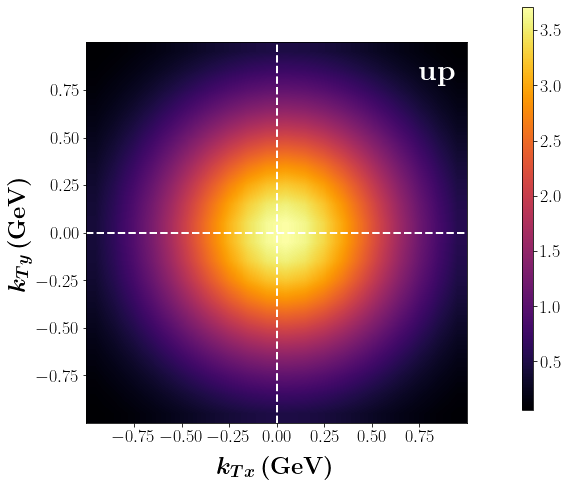

In [89]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import Normalize
import matplotlib.cm as cm

npixels = 20

kTx = np.linspace(-1,1,npixels)
kTy = np.linspace(-1,1,npixels)
X, Y = np.meshgrid(kTx, kTy)

Z=[]
x = 0.1
Q2 = 10

irep = 0 # this can be changed to produce replicas of images, can be from 0 to 465
for ky in kTy:
    Z1 = []
    for kx in kTx:
        Z1.append(plot_function_u(irep,x,Q2,kx,ky))
    Z.append(Z1)
    
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*7,nrows*7))
ax=py.subplot(nrows,ncols,1)   
ax.axhline(0,color='white',ls='--',linewidth=2)
ax.axvline(0,color='white',ls='--',linewidth=2)
c1 = ax.imshow(Z, interpolation='bilinear', origin='lower',
               cmap=cm.inferno, extent=(-1, 1, -1, 1))
#c1=ax.contourf(X,Y,Z,cmap='inferno',levels=npixels)
ax.set_ylabel(r'\boldmath{$k_{Ty}\,{\rm (GeV)}$}',fontsize=24)
ax.set_xlabel(r'\boldmath{$k_{Tx}\,{\rm (GeV)}$}',fontsize=24,labelpad=10)
ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
ax.tick_params(labelsize=18)
#ax.set_yticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
#                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])
ax.set_xticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
#ax.set_xticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
#                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])

ax.text(0.875,0.9,r'\boldmath{${\rm up}$}',size=30,color='white',transform=ax.transAxes)

cbar_ax=fig.add_axes([1., 0.15, 0.02, 0.8])
cbar_ax.tick_params(labelsize=18)

cbar=fig.colorbar(c1,cax=cbar_ax)

plot_path = mypath+f'/images/sivers_npixels={npixels}x{npixels}_3D.pdf'
py.savefig(plot_path)

Possible color scheme is this one:

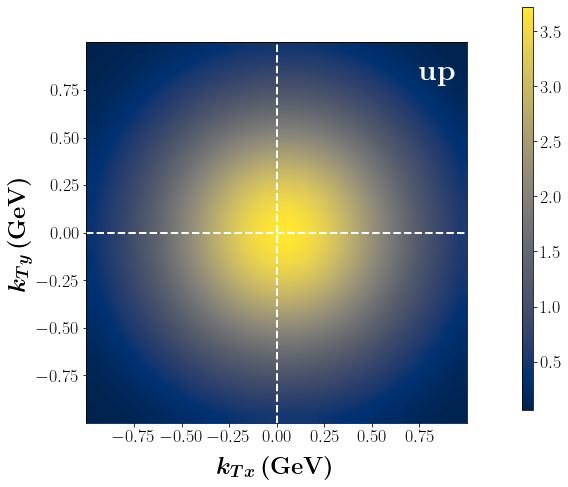

In [90]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import Normalize
import matplotlib.cm as cm

npixels = 25

kTx = np.linspace(-1,1,npixels)
kTy = np.linspace(-1,1,npixels)
X, Y = np.meshgrid(kTx, kTy)

Z=[]
x = 0.1
Q2 = 10

irep = 0 # this can be changed to produce replicas of images, can be from 0 to 465
for ky in kTy:
    Z1 = []
    for kx in kTx:
        Z1.append(plot_function_u(irep,x,Q2,kx,ky))
    Z.append(Z1)
    
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*7,nrows*7))
ax=py.subplot(nrows,ncols,1)   
ax.axhline(0,color='white',ls='--',linewidth=2)
ax.axvline(0,color='white',ls='--',linewidth=2)
c1 = ax.imshow(Z, interpolation='bilinear', origin='lower',
               cmap=cm.cividis, extent=(-1, 1, -1, 1))
#c1=ax.contourf(X,Y,Z,cmap='inferno',levels=npixels)
ax.set_ylabel(r'\boldmath{$k_{Ty}\,{\rm (GeV)}$}',fontsize=24)
ax.set_xlabel(r'\boldmath{$k_{Tx}\,{\rm (GeV)}$}',fontsize=24,labelpad=10)
ax.set_yticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
ax.tick_params(labelsize=18)
#ax.set_yticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
#                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])
ax.set_xticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75])
#ax.set_xticklabels([r'\boldmath{$-0.75$}',r'\boldmath{$-0.5$}',r'\boldmath{$-0.25$}',\
#                     r'\boldmath{$0.0$}',r'\boldmath{$0.25$}',r'\boldmath{$0.5$}',r'\boldmath{$0.75$}'])

ax.text(0.875,0.9,r'\boldmath{${\rm up}$}',size=30,color='white',transform=ax.transAxes)

cbar_ax=fig.add_axes([1., 0.15, 0.02, 0.8])
cbar_ax.tick_params(labelsize=18)

cbar=fig.colorbar(c1,cax=cbar_ax)

plot_path = mypath+f'/images_sivers/sivers_npixels={npixels}x{npixels}_3D.pdf'
py.savefig(plot_path)

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Initialize variables
kTx = np.linspace(-1, 1, 15)
kTy = np.linspace(-1, 1, 15)
x = 0.1
Q2 = 10
num_replicas = 465  # Total replicas

# Create a directory for images
os.makedirs(mypath+'/images', exist_ok=True)

# Generate and save images
for irep in range(num_replicas):
    X, Y = np.meshgrid(kTx, kTy)
    Z = []

    lprint('progress: %s/%s'%(irep,num_replicas)) # monitor the progress

    for ky in kTy:
        Z1 = []
        for kx in kTx:
            Z1.append(plot_function_u(irep, x, Q2, kx, ky))
        Z.append(Z1)

    # Create the image
    fig, ax = plt.subplots()
    #im = ax.imshow(Z, interpolation='bilinear', origin='lower', cmap='plasma', extent=(-1, 1, -1, 1))
    #ax.contour(X, Y, Z)
    im = ax.imshow(Z, interpolation='bilinear', origin='lower', cmap='inferno', extent=(-1, 1, -1, 1))
    #ax.contour(X, Y, Z)
    plt.axis('off')  # Hide the axes

    # Save the figure
    plt.savefig(mypath+f'/images/Z_matrix_replica_{irep}.jpeg', format='jpeg', bbox_inches='tight', pad_inches=0)
    plt.close(fig)  # Close the figure to free up memory

print("All images have been generated and saved.")

progress: 464/465All images have been generated and saved.


In [57]:
import zipfile

# Create a zip file for all the images
zip_path = mypath+'/images_replicas.zip'
with zipfile.ZipFile(zip_path, 'w') as zipf:
    for foldername, subfolders, filenames in os.walk('images'):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)  # Complete path to file
            zipf.write(file_path, os.path.relpath(os.path.join(foldername, filename), 'images'))

print("JPEG files have been successfully zipped.")


JPEG files have been successfully zipped.
